# Task
Generate Python code to demonstrate the use of SHAP for explaining a linear regression model trained on a publicly available dataset.

## Load the dataset

### Subtask:
Load a publicly available dataset suitable for linear regression.


**Reasoning**:
Import and load the California housing dataset and print its description.



In [1]:
from sklearn.datasets import fetch_california_housing

# Load the dataset
california_housing = fetch_california_housing()

# Print the description
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

## Prepare data

### Subtask:
Split the dataset into training and testing sets.


**Reasoning**:
Create the DataFrame and Series, then split the data into training and testing sets.



In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
y = pd.Series(california_housing.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (16512, 8)
X_test shape: (4128, 8)
y_train shape: (16512,)
y_test shape: (4128,)


In [8]:
print(X_train.head())

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
14196  3.2596      33.0  5.017657   1.006421      2300.0  3.691814     32.71   
8267   3.8125      49.0  4.473545   1.041005      1314.0  1.738095     33.77   
17445  4.1563       4.0  5.645833   0.985119       915.0  2.723214     34.66   
14265  1.9425      36.0  4.002817   1.033803      1418.0  3.994366     32.69   
2271   3.5542      43.0  6.268421   1.134211       874.0  2.300000     36.78   

       Longitude  
14196    -117.03  
8267     -118.16  
17445    -120.48  
14265    -117.11  
2271     -119.80  


In [10]:
print(y_train.head())

14196    1.030
8267     3.821
17445    1.726
14265    0.934
2271     0.965
dtype: float64


## Train a linear regression model

### Subtask:
Train a linear regression model on the training data.


**Reasoning**:
Train a linear regression model using the training data.



In [3]:
from sklearn.linear_model import LinearRegression

# Instantiate a LinearRegression object
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

## Calculate shap values

### Subtask:
Calculate SHAP values for the linear regression model on the testing data.


**Reasoning**:
Calculate SHAP values for the linear regression model on the testing data.



In [4]:
import shap

# Create a SHAP explainer object
explainer = shap.LinearExplainer(model, X_train)

# Calculate SHAP values for the testing data
shap_values = explainer.shap_values(X_test)

## Visualize shap results

### Subtask:
Visualize the SHAP values to explain the model's predictions.


**Reasoning**:
Generate a summary plot of the SHAP values to visualize the feature importance and impact on the model's predictions.



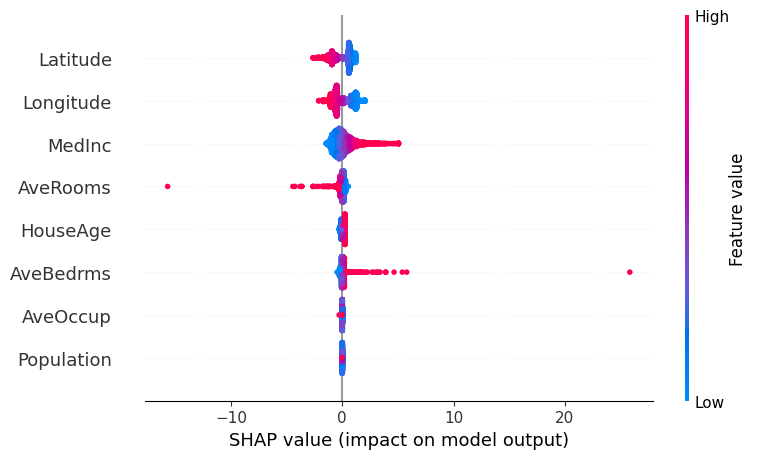

In [5]:
shap.summary_plot(shap_values, X_test)

**Reasoning**:
The summary plot provides a good overview of feature importance. To gain further insight into the impact of individual features, a dependence plot can be generated for a selected feature.



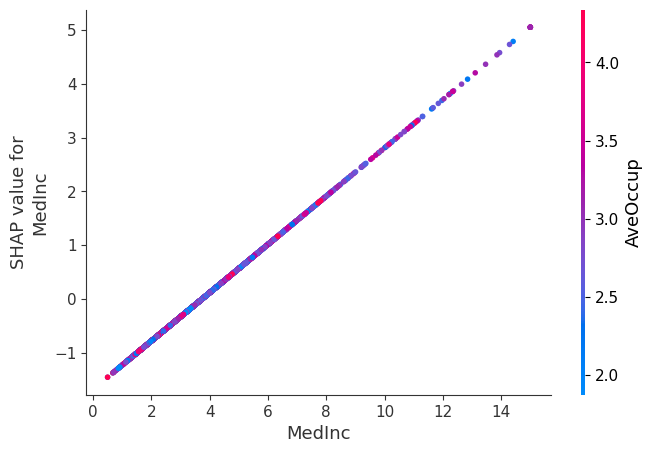

In [6]:
shap.dependence_plot("MedInc", shap_values, X_test)

**Reasoning**:
The previous plots have provided insights into the overall feature importance and the relationship between a single feature and its SHAP values. To understand how multiple features contribute to a single prediction, a force plot can be generated for a specific instance in the testing data.



In [7]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

## Summary:

### Data Analysis Key Findings

*   The California Housing dataset, suitable for linear regression, was loaded and described. It contains 8 numerical features and a target variable (median house value).
*   The dataset was successfully split into training (80%) and testing (20%) sets, resulting in 16512 training samples and 4128 testing samples.
*   A Linear Regression model was trained on the training data.
*   SHAP values were calculated for the linear regression model on the testing data using `shap.LinearExplainer`.
*   Several SHAP visualizations were generated, including a summary plot showing overall feature importance, a dependence plot illustrating the relationship between the "MedInc" feature value and its SHAP value, and a force plot explaining a single instance's prediction by showing each feature's contribution.

### Insights or Next Steps

*   The SHAP visualizations effectively demonstrate which features have the most significant impact on the linear regression model's predictions and how individual feature values influence specific predictions.
*   Further analysis could involve exploring dependence plots for other features to understand their relationships with the target variable and investigating specific instances with high or low prediction errors using force plots to identify potential issues or interesting patterns.


## Predict for a single instance

### Subtask:
Predict the house value for the first record in the testing data.

**Reasoning**:
Select the first instance from the test set and use the trained model to predict its house value.

In [11]:
# Select the first instance from the test set
first_instance = X_test.iloc[[0]]

# Predict the house value for the first instance
predicted_value = model.predict(first_instance)

print(f"Predicted house value for the first instance: ${predicted_value[0]*100000:.2f}")

Predicted house value for the first instance: $71912.28


## Explain the prediction for the first instance

### Subtask:
Generate a SHAP force plot to explain the prediction for the first instance.

**Reasoning**:
Generate a SHAP force plot for the first instance in the test set to visualize the contribution of each feature to the predicted value.

In [12]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], first_instance)